# XOR, linear separability, and decision boundaries

Author: Jeremy Dolan

In this notebook, we:
* Discuss the XOR function and its notoriety in early neural networking
* Discuss linear separability and how multi-layer networks can solve linearly
  *inseparable* problems
* Use our [MLP framework](mlp_framework_vanilla.py) to construct a multi-layer
  perceptron that learns XOR
* Analyze the trained network's parameters and visualize its decision
  boundaries to see how it constitutes a XOR circuit

NB: The neural network framework (and this analysis) is written without
numpy/pytorch/tensorflow/scikit-learn for educational purposes. It is wildly
inefficient.

In [1]:
# Our feed forward network framework:
from mlp_framework_vanilla import *
# Pyplot code for this notebook's illustrations:
import plots.xor

## XOR

XOR (“exclusive or”) is a binary Boolean function; it maps 2 truth value
inputs (by convention: $0$ for false, $1$ for true) to one truth value output:

$$f : \{0,1\}^2 → \{0,1\}$$

The _input space_ for a binary Boolean function consists of 2 inputs
(dimensions) with 2 possible values, giving us $2^2 = 4$ points: $(0,0)$,
$(0,1)$, $(1,0)$, and $(1,1)$. Each of those $2^2$ input pairs can
independently map to 2 possible output values, for a total of $2^{2^2} = 16$
possible functions. XOR is the name we give to the function that maps points
$(0,1)$ and $(1,0)$ to true, and points $(0,0)$ and $(1,1)$ to false. It
corresponds to the idea: "One or the other, _but not both_."

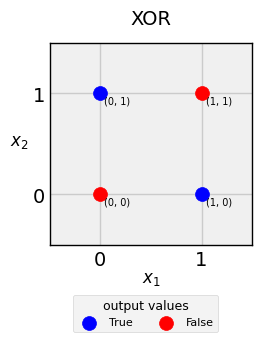

In [2]:
plots.xor.plot_binary_Boolean_input_space_with_XOR_output()

## Linear separability

As Marvin Minsky and Seymour Papert infamously underscored (_Perceptrons_,
1969), a single layer neural network can only be made to fit linearly separable
data: that is, data for which a single, straight line can separate two classes
of interest. For example, "OR" (inclusive or) is linearly separable: it is true
for three of the four points in our Boolean input space (the points where one,
or the other, or both inputs are true), and we can draw a straight line (a
“decision boundary”) separating these three points from the one point where it
is false (“OR classification,” below, left).

XOR, however, is _not_ linearly separable. There is no line you can draw that
will partition the input space in such a way as to separate the input points
that map to true from the input points that map to false (below, right).

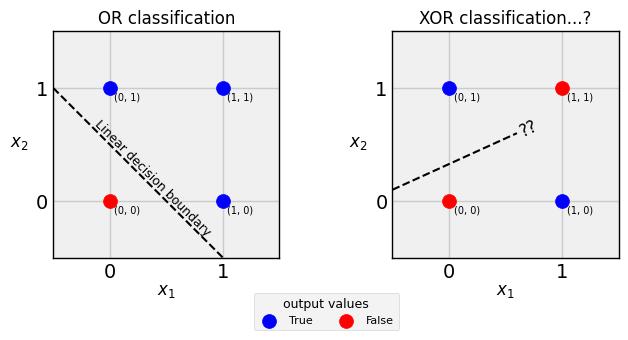

In [3]:
plots.xor.plot_linear_separation_OR_vs_XOR()

Minsky and Papert were correct that a *single-layer* neural network cannot
learn the XOR function, or any other linearly-inseparable function, no matter
how many nodes and connections it may have, or how we configure and train those
nodes and connections. With neither the computational power nor viable training
techniques for *multi-layer* networks in sight at the time, the pair argued
that this was a fundamental limitation for the connectionist approach to AI &mdash;
thus relegating neural networks to solving only toy problems, with no hope of
scaling to more general-purpose learning.

> Many commentators credit Minsky and Papert's criticisms with playing a large
> role in the shift away from neural network research (and a decline in funding
> for AI in general) in the 1970s and early 1980s, although it seems their
> actual impact may be largely mythologized: see Olazaran (1996) “[A
> Sociological Study of the Official History of the Perceptrons
> Controversy][1],” and Liu (2024) “[The Perceptron Controversy][2].”

[1]: https://journals.sagepub.com/doi/abs/10.1177/030631296026003005
[2]: https://yuxi-liu-wired.github.io/essays/posts/perceptron-controversy/#ref-olazaranHistoricalSociologyNeural1991

Neural networks are no longer limited to a single layer (and indeed can be
hundreds of layers deep) thanks to Moore's Law, and the successful application
of backpropagation with gradient descent to training. But how does adding
additional layers allow a multi-layer neural network to do what a single layer
network cannot, namely, create non-linear decision boundaries in order to model
linearly-inseparable functions.

To help visualize how additional layers enable a linearly-inseparable problem
to be broken down into linearly-separable steps, we will now construct a
two-layer network and analyze how it learns XOR.

# Implementation

Now we construct and train a network so that it learns the XOR function.

### Activation and loss function choice
Since we are working with binary values and, in effect, modeling Boolean
algebra, sigmoid is a natural choice for the activation function throughout our
network. Sigmoid squashes its input between 0 and 1, and we can interpret its
proximity to 0 or 1 as corresponding to the probability of the input belonging
to the false (0) or true (1) class for some Boolean operation.
 
Likewise, log loss is a natural choice for the loss function on our network's
output, as it is designed for probabilistic outputs of a binary classification
— which is what the sigmoid function produces.

Let's visualize the functions we'll use:

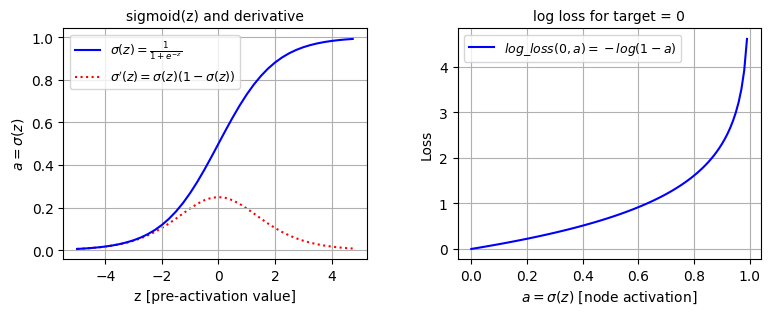

In [4]:
plots.xor.plot_functions(sigmoid, sigmoid_derivative, binary_cross_entropy)

### Initialization

Initialize a network with the bare minimum depth (two layers) and breadth (two
hidden nodes, one output node) to implement XOR:

In [5]:
xor_net = Net(inputs=2, shape=[2, 1], activation_fxs=[sigmoid]*2, loss_fx=binary_cross_entropy)
xor_net.show_params()

layer 1, node 1, node.weights=[-0.2832638154022102, -0.41720501524284204] node.bias=0.0
layer 1, node 2, node.weights=[-0.47722763253839146, 0.37729709828454816] node.bias=0.0
layer 2, node 1, node.weights=[0.24080839889037933, 0.2161996326251032] node.bias=0.0


### Training

Our training data is simply all four input/output pairs for the XOR function:

In [6]:
# training data format is a dict with keys 'x' for input vector and 'y' for true output vector
xor_training = [
    {'x': [0,0], 'y': [0]},
    {'x': [0,1], 'y': [1]},
    {'x': [1,0], 'y': [1]},
    {'x': [1,1], 'y': [0]},
]

Train the network, using batch gradient decent:

epoch 1000 complete, 1 batch, training_loss=0.69356
epoch 2000 complete, 1 batch, training_loss=0.27233
epoch 3000 complete, 1 batch, training_loss=0.02589
epoch 4000 complete, 1 batch, training_loss=0.00969
epoch 5000 complete, 1 batch, training_loss=0.00652
layer 1, node 1, node.weights=[6.831827013249931, -6.609386795572152] node.bias=3.3123836408364813
layer 1, node 2, node.weights=[6.292434186190435, -6.545524602113627] node.bias=-3.351251762869954
layer 2, node 1, node.weights=[-11.036143738710107, 11.608473968845082] node.bias=5.173794011353441


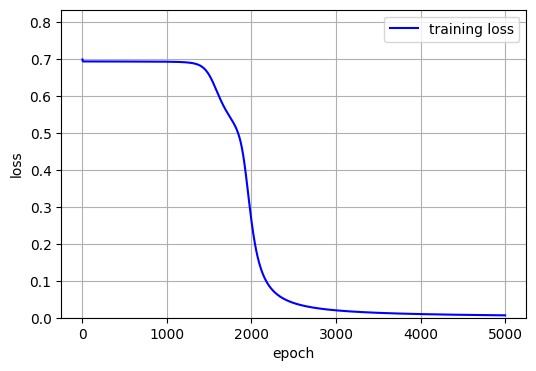

In [7]:
# high learning rate helps get us off initial plateau, not so high as to overshoot
results = xor_net.train(training_data=xor_training, epochs=5_000, learning_rate=0.5, epoch_progress_every_n=1000)
xor_net.show_params()
plots.xor.plot_training_loss(results['training_loss'])

### Prediction

The loss from the final training epoch suggests the network is adequately
trained, but we can check its predictions:

In [8]:
for training_case in xor_training:
    x = training_case['x']          # input
    y = training_case['y'][0]       # correct output
    ŷ = xor_net.forward(x)[-1][0]   # predicted output
    ŷ_class = 0 if ŷ < 0.5 else 1   # categorized output

    print(f'{x[0]} XOR {x[1]} --prediction--> {ŷ_class}  ', 
           'correct! \u2705' if y == ŷ_class else 'miss! \u274C   ',
          f'  ({ŷ=:f}, loss={xor_net.loss_fx([y], [ŷ]):f})')

1 XOR 1 --prediction--> 0   correct! ✅   (ŷ=0.005261, loss=0.005275)
0 XOR 1 --prediction--> 1   correct! ✅   (ŷ=0.991679, loss=0.008355)
0 XOR 0 --prediction--> 0   correct! ✅   (ŷ=0.006173, loss=0.006192)
1 XOR 0 --prediction--> 1   correct! ✅   (ŷ=0.994316, loss=0.005701)


# Analysis

## Parameter analysis

We have successfully trained a network to model XOR. So how does this network
implement a linearly inseparable function? To start to investigate, let's
examine the parameters of the first hidden node:

In [9]:
node = xor_net.layers[0].nodes[0]

print(f'weights: {node.weights}')
print(f'bias: {node.bias}')

weights: [6.831827013249931, -6.609386795572152]
bias: 3.3123836408364813


With these parameters we can reason out exactly what this node will do. Recall
the process of calculating a node's activation: each weight $w_i$ is multiplied
by its corresponding input $x_i$, these weighted inputs are summed, and then
the bias $b$ is added to get our “pre-activation” value $z$.

$$z = \Sigma_{i} w_{i} x_i + b$$

Finally, we feed $z$ into our activation function (sigmoid, $\sigma$)
to get the node's final activation $a$.

$$a = \sigma(z)$$

Also recall that the sigmoid function (graphed above) squashes all positive
values into the range (0.5, 1), which we will classify as true, and all
negative values into the range (0, 0.5), which we will classify as false.
* positive $z$ → $a$ > 0.5 → "true"
* negative $z$ → $a$ < 0.5 → "false"

So we can determine the classification just by determining whether $z$ is
positive or negative. Since our node has only two binary inputs, it's simple
enough to reason through which input pairs should give us a positive $z$ and
which should give us a negative $z$ for the parameters from above:
<!-- Ideally would dynamically analyze the following... -->
```yaml
    weights: [6.831827013249931, -6.609386795572152]
    bias: 3.3123836408364813
```
First note that the bias is positive, so “by default,” $z$ will be positive.
Note also the weights are approximately equal in magnitude, but with opposite
signs. So if both inputs are $1$, the weighted inputs will roughly cancel out
and the bias will dominate, giving us positive $z \approx b$. All the more so
if only the first input is $1$, as then the first weight will be added into
$z$. And of course if both inputs are $0$, then $z = b$ and is positive. So the
only way for $z$ to be negative is if just the second input is $1$, and its
negative weight overcomes the positive bias.

In sum, our inspection reveals that this node draws its decision boundary so as
to separate the point $(0,1)$, classifying it as false, from the other three
Boolean inputs, which it classifies as true. But let's now verify this in a
more automated way.

## Visualizing decision boundaries

Our network counts as a model of XOR when it correctly categorizes the four
Boolean input points. For purposes of Boolean algebra, those four points are
all that matters.

Generally speaking, however, our model is a function that maps any two
real-valued inputs to an output value in the interval $(0,1)$. So we can sample
its output at arbitrary points in the two-dimensional input space, and if we
plot enough points, we can reveal just where the model's predictions switch
from True to False &mdash; that is, we can visualize the decision boundary that
a node (or entire model) has learned.

First we write a function to evaluate another function over an $N \times N$
grid of points in some region of input space:

In [10]:
def meshgrid_eval(func:Callable, start:float, stop:float, N:int):
    '''evaluate given function on an N x N grid of evenly-spaced points spanning [start, stop] along both axes.'''
    step_size = (stop-start)/N
    N += 1 # make the range inclusive on both ends

    meshgrid = []
    for i in range(N):
        arg_2 = start + (i*step_size)
        row = []
        for j in range(N):
            arg_1 = start + (j*step_size)
            row.append(func([arg_1, arg_2]))
        meshgrid.append(row)
    return meshgrid

def node_eval(net:Net, layer:int, node:int, start:float, stop:float, N:int):
    '''wrapper for `meshgrid_eval` to activate a Node'''
    node_compute = net.layers[layer].nodes[node].compute
    node_activation = net.layers[layer].activation_fx
    node_eval = lambda inputs: node_activation([node_compute(inputs)])
    return meshgrid_eval(node_eval, start, stop, N)

Then we call this function to activate the node at each point in the $N \times
N$ grid, and plot the output. We specify the grid so that it extends over a
region surrounding the four original inputs (say, from -0.5 to 1.5 along both
axes), with 100 points in each direction, for 100x100=10,000 total points to
sample.

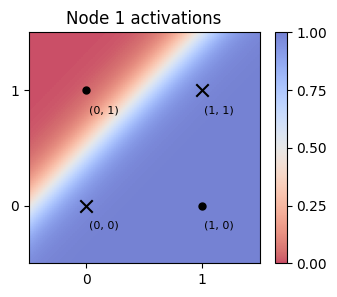

In [11]:
# sample node 1's activation value for 100x100 points in input space with boundary [−0.5, 1.5] on both axes
meshgrid_node1 = node_eval(xor_net, layer=0, node=0, start=-0.5, stop=1.5, N=100)

# plot the resulting activations as a gradient over the input space
plots.xor.plot_meshgrid(meshgrid_node1, 'Node 1 activations')

As we expected, the decision boundary is linear, and it separates $(0,1)$ from
the other three points.

With this same technique, we can also plot the decision boundary for the other
hidden node and for the network as a whole:

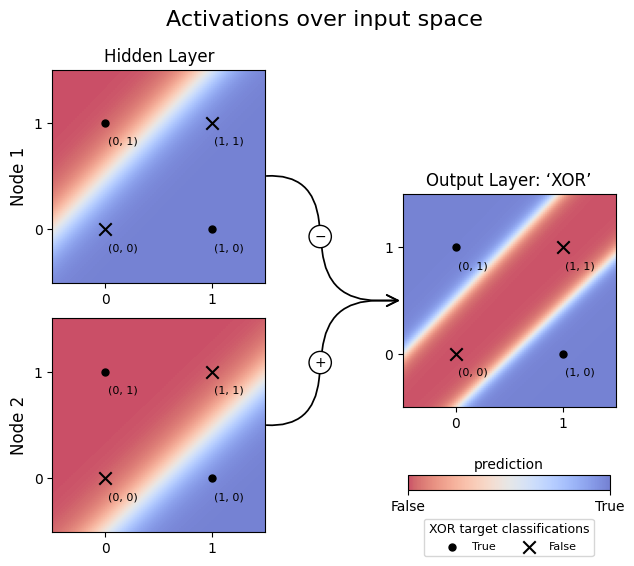

In [12]:
meshgrid_node2 = node_eval(xor_net, layer=0, node=1, start=-0.5, stop=1.5, N=100)
meshgrid_full_net = meshgrid_eval(lambda inputs: xor_net.forward(inputs)[-1][0], start=-0.5, stop=1.5, N=100)
plots.xor.plot_net_meshgrids('Activations over input space',
                             node1=meshgrid_node1,
                             node2=meshgrid_node2,
                             output_node=meshgrid_full_net,
                             output_weights=xor_net.layers[1].nodes[0].weights)

These activation maps show how each node's activations are mapped to the input
space, and depict the evolution of the decision boundary across the two layers.

The axes (and the labeled points) are the Boolean inputs to the network. As we
can see, the decision boundaries for the nodes in layer one are linear, but the
the output layer's decision boundary is *non-linear* (being composed of *two*
lines).

Each node in layer one has learned a decision boundary that separates one point
from the other three: node one separates out $(0,1)$, and node two separates
out $(1,0)$. Together, those two points constitute the 'True' class for XOR.

Layer two can then conjoin, disjoin, and negate (as needed) those layer-one
outputs as needed. (Conjunction, disjunction, and negation are all linearly
separable functions.) The resulting activations depicted above for the output
node show the conjoining and negating of the decision boundaries from layer
one.

----

It's worth noting that it doesn't matter *how* the nodes in layer one end up
carving out the two points (e.g., it doesn't matter which points map to ~0 or
~1 activation), because downstream layers can simply use a negative weight for
the incoming signal to invert it. We see this demonstrated here in node one's
assigning of ~0 ("false") to the True XOR point $(0,1)$, and this output then
flowing through a negative weight (indicated by the minus sign along the line)
and being inverted. Node two, meanwhile, isolates out the other True XOR input
point, but maps it to ~1, so the network retains this value's sign through a
positive weight.

It also doesn't matter if layer one isolates out both of the points in input
space that are true for XOR, or both of the points that are false for XOR.
Either way, layer two can appropriately combine the information. If we train a
new network, we can easily find one which isolates out the other set of points,
and draws a very different decision boundary for the output:

In [13]:
xor_alt = Net(inputs=2, shape=[2, 1], activation_fxs=[sigmoid]*2, loss_fx=binary_cross_entropy)
xor_alt.train(training_data=xor_training, epochs=5_000, learning_rate=0.75, epoch_progress_every_n=5_000)
xor_alt.show_params()

epoch 5000 complete, 1 batch, training_loss=0.00306
layer 1, node 1, node.weights=[7.424773212853085, 7.41057679007845] node.bias=-3.3934122026581983
layer 1, node 2, node.weights=[5.590156118636216, 5.587520777115694] node.bias=-8.548223267532165
layer 2, node 1, node.weights=[12.7503937686744, -13.546822955001526] node.bias=-5.965814092194756


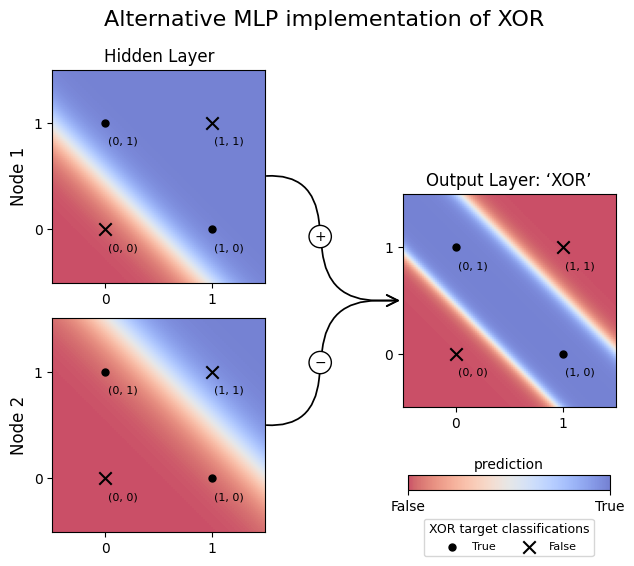

In [14]:
altgrid_node1    = node_eval(xor_alt, layer=0, node=0, start=-0.5, stop=1.5, N=100)
altgrid_node2    = node_eval(xor_alt, layer=0, node=1, start=-0.5, stop=1.5, N=100)
altgrid_full_net = meshgrid_eval(lambda inputs: xor_alt.forward(inputs)[-1][0], start=-0.5, stop=1.5, N=100)
plots.xor.plot_net_meshgrids('Alternative MLP implementation of XOR', node1=altgrid_node1, node2=altgrid_node2,
                             output_node=altgrid_full_net, output_weights=xor_alt.layers[1].nodes[0].weights)

We can also imagine how this composing of linear into non-linear modeling can scale:
* additional nodes in layer one could isolate out additional linearly-separable
  aspects of an input,
* additional nodes in layer two could combine those in additional ways, and
* additional layers beyond the second could iterate on these combinations
  again, allowing the network to model increasingly complex, non-linear
  functions

Each additional layer enables the network to capture higher-order interactions between inputs, effectively building up more intricate decision boundaries that&mdash;given sufficient breadth and depth—can approximate any continuous function.

## Distribution shift

Since we have two trained networks that implement XOR in different ways, we can
also demonstrate the problem of distribution shift for neural networks.

Input space is vast. Optimal fit for any given training data under-determines
how to categorize new inputs that differ from the training set.

For this second trained network, we can see that each node in layer 1 isolated
one of the pair of input points $(0,0)$ and $(1,1)$ which constitute the
'false' XOR class. Per our earlier discussion, this is *also* a perfectly
viable way to implement XOR.

However, the resulting network will generalize to inputs from outside the
domain of XOR quite differently from our first model. While this can be seen
visually in the output node's decision boundary being rotated 90º from our
first network, we can also have our two networks make predictions for the out
of distribution point (-0.5, 0.5):

In [15]:
in_domain_point = (0, 1)
OOD_point = (-0.5, 0.5)
print(f'Models correctly trained, agreement about in domain point {in_domain_point}:')
print(f'\txor_net:{xor_net.forward(in_domain_point)[-1][0]}\txor_alt:{xor_alt.forward(in_domain_point)[-1][0]}')
print(f'Disagreement about out of distribution point {OOD_point}:')
print(f'\txor_net:{xor_net.forward(OOD_point)[-1][0]}\txor_alt:{xor_alt.forward(OOD_point)[-1][0]}')

Agreement about in domain point (0, 1):
	xor_net:0.9941242203337124	xor_alt:0.9989688610922535
Disagreement about out of domain point (-0.5, 0.5):
	xor_net:0.9945695065464505	xor_alt:0.0009899912819332569
